Tarefa 01
 • Crie um jupyter notebook com os imports necessários e um código para gerar os 
gráficos referentes a base de dados de março, abril, maio, junho e dezembro 
(numa célula só ou em várias)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()  

In [48]:
sinasc = pd.read_csv('SINASC_RO_2019_JAN.csv')
sinasc.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,29,Feminino,7.0,9.0,3020,4,2019-01-16,37 a 41 semanas,Única,12 anos ou mais,NaN
1,25,Masculino,7.0,9.0,3000,4,2019-01-24,37 a 41 semanas,Única,12 anos ou mais,NaN
2,35,Feminino,9.0,10.0,3390,4,2019-01-02,37 a 41 semanas,Única,8 a 11 anos,NaN
3,24,Masculino,8.0,9.0,2920,3,2019-01-07,37 a 41 semanas,Única,12 anos ou mais,NaN
4,26,Feminino,9.0,9.0,3320,4,2019-01-15,37 a 41 semanas,Única,12 anos ou mais,NaN


In [50]:
sinasc.DTNASC.value_counts()

DTNASC
2019-01-16    97
2019-01-07    91
2019-01-21    91
2019-01-14    90
2019-01-15    90
2019-01-08    90
2019-01-31    86
2019-01-17    85
2019-01-23    83
2019-01-11    79
2019-01-30    77
2019-01-03    77
2019-01-28    76
2019-01-18    76
2019-01-12    75
2019-01-04    73
2019-01-29    71
2019-01-05    71
2019-01-09    69
2019-01-24    69
2019-01-02    68
2019-01-10    66
2019-01-13    64
2019-01-06    64
2019-01-27    63
2019-01-19    59
2019-01-22    58
2019-01-26    55
2019-01-20    52
2019-01-25    50
2019-01-01    48
Name: count, dtype: int64

In [52]:
#intervalo de datas presente na coluna DTNASC

sinasc.DTNASC.min(), sinasc.DTNASC.max()

('2019-01-01', '2019-01-31')

In [54]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")
%matplotlib inline


In [56]:
# Carregar todos os arquivos em um único DataFrame
mar = pd.read_csv('SINASC_RO_2019_MAR.csv')
abr = pd.read_csv('SINASC_RO_2019_ABR.csv')
mai = pd.read_csv('SINASC_RO_2019_MAI.csv')
jun = pd.read_csv('SINASC_RO_2019_JUN.csv')
dez = pd.read_csv('SINASC_RO_2019_DEZ.csv')

# Unir os dados em um único DataFrame
sinasc = pd.concat([mar, abr, mai, jun, dez], ignore_index=True)

# Converter a coluna de data para datetime (se necessário)
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])



C:\Users\Usuario\AppData\Local\Temp\ipykernel_9412\3132958602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nascimentos_por_mes.index, y=nascimentos_por_mes.values, palette="viridis")


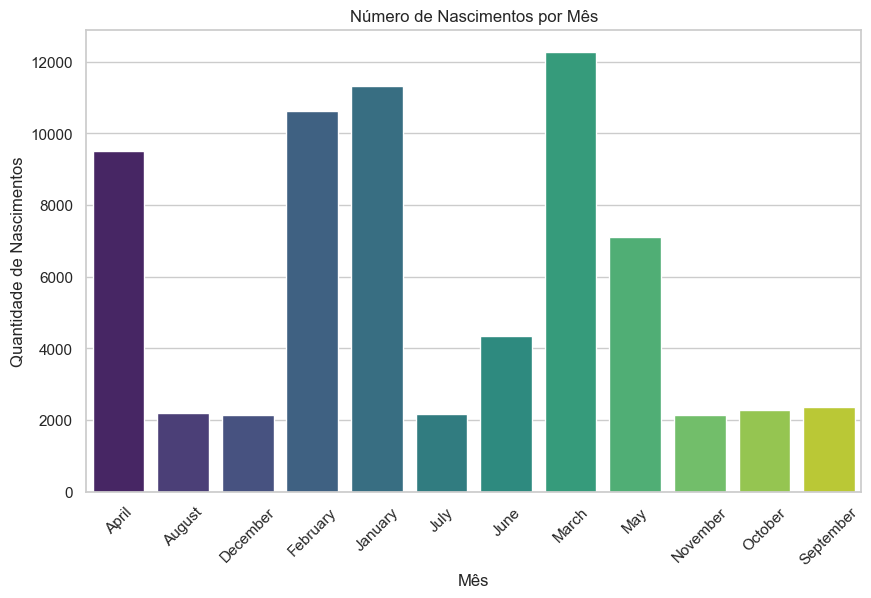

In [60]:
#Número de nascimentos por mês
sinasc['mes'] = sinasc['DTNASC'].dt.month_name()
nascimentos_por_mes = sinasc['mes'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=nascimentos_por_mes.index, y=nascimentos_por_mes.values, palette="viridis")
plt.title('Número de Nascimentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Nascimentos')
plt.xticks(rotation=45)
plt.show()


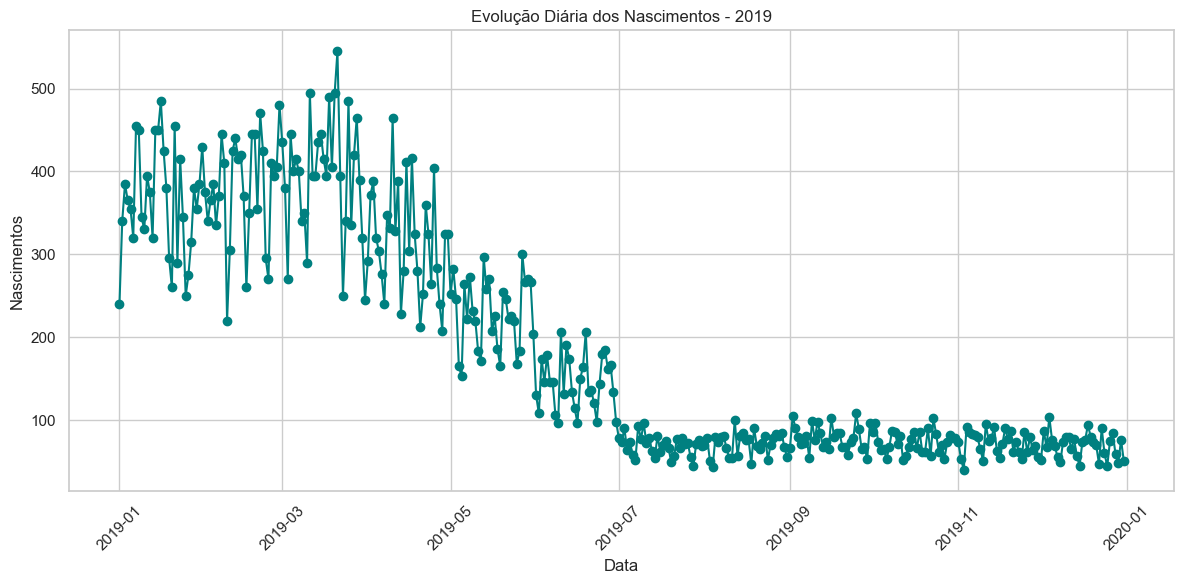

In [64]:
#Evolução dos nascimentos ao longo do tempo 

nasc_diarios = sinasc.groupby(sinasc['DTNASC'].dt.date).size()

plt.figure(figsize=(12,6))
nasc_diarios.plot(kind='line', marker='o', color='teal')
plt.title('Evolução Diária dos Nascimentos - 2019')
plt.xlabel('Data')
plt.ylabel('Nascimentos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 Tarefa 02 • Como que você poderia fazer para deixar isso mais automatizado? Descreva na 
última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos 
pros meses/anos seguintes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9412\1613610573.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dados.index, y=dados.values, palette='crest')


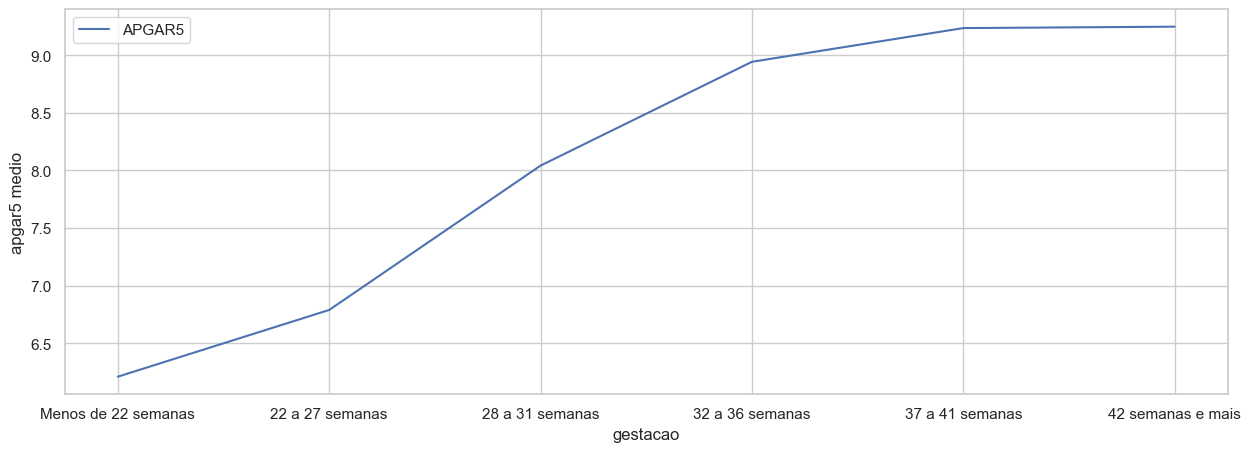

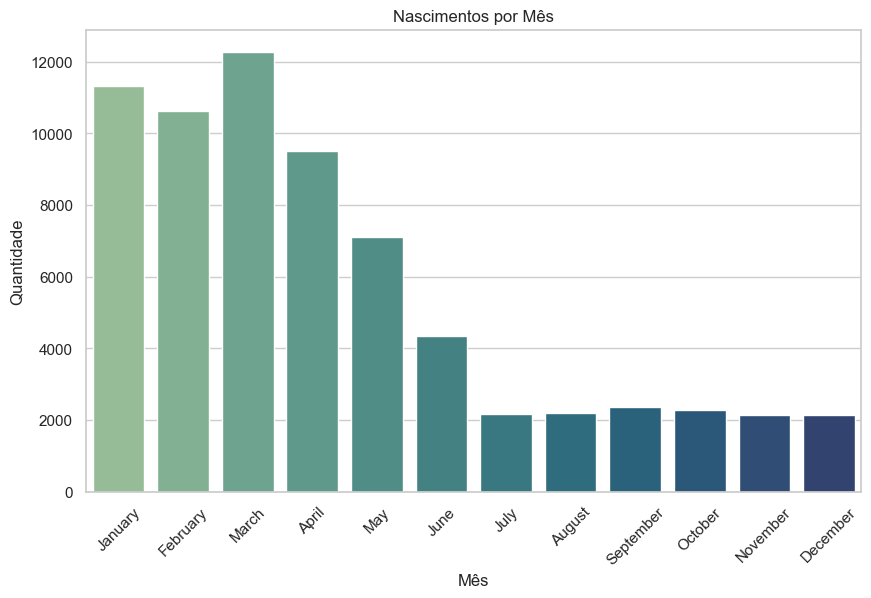

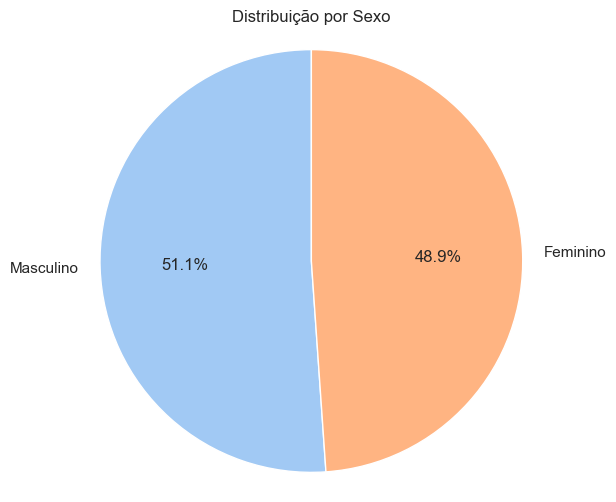

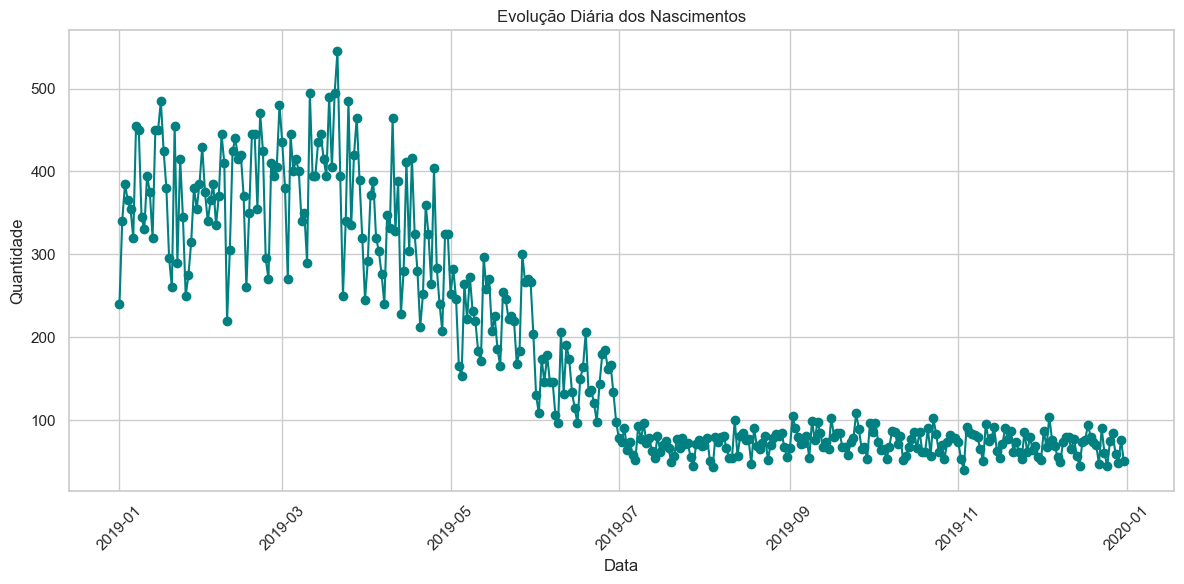

In [71]:
# SINASC - Análise de Nascimentos em RO (2019)

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set(style="whitegrid")
%matplotlib inline

# --------------------------
# Funções auxiliares
# --------------------------

def carregar_dados(ano, meses, caminho_base='.'):
        #Carrega os arquivos SINASC para os meses e ano especificados.

    frames = []
    for mes in meses:
        nome_arquivo = f"SINASC_RO_{ano}_{mes.upper()}.csv"
        caminho = os.path.join(caminho_base, nome_arquivo)
        if os.path.exists(caminho):
            df = pd.read_csv(caminho)
            frames.append(df)
        else:
            print(f"Arquivo não encontrado: {caminho}")
    return pd.concat(frames, ignore_index=True)


def preparar_dados(df):
    """
    Formata datas e adiciona colunas auxiliares.
    """
    df['DTNASC'] = pd.to_datetime(df['DTNASC'])
    df['mes'] = df['DTNASC'].dt.strftime('%B')
    df['dia'] = df['DTNASC'].dt.date
    return df


def grafico_nascimentos_por_mes(df):
    ordem_meses = sorted(df['mes'].unique(), key=lambda x: datetime.strptime(x, '%B').month)
    dados = df['mes'].value_counts().reindex(ordem_meses)

    plt.figure(figsize=(10,6))
    sns.barplot(x=dados.index, y=dados.values, palette='crest')
    plt.title('Nascimentos por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.show()


def grafico_sexo_pizza(df):
    sexo = df['SEXO'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(sexo, labels=sexo.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title('Distribuição por Sexo')
    plt.axis('equal')
    plt.show()


def grafico_evolucao_diaria(df):
    diarios = df.groupby('dia').size()
    plt.figure(figsize=(12,6))
    diarios.plot(kind='line', marker='o', color='teal')
    plt.title('Evolução Diária dos Nascimentos')
    plt.xlabel('Data')
    plt.ylabel('Quantidade')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --------------------------
# Execução da análise
# --------------------------

# Definir parâmetros
ano = 2019
meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']

# Carregar e preparar dados
df = carregar_dados(ano, meses)
df = preparar_dados(df)

# Gerar gráficos
grafico_nascimentos_por_mes(df)
grafico_sexo_pizza(df)
grafico_evolucao_diaria(df)

# --------------------------
# Sugestão de automatização futura (Markdown)
# --------------------------

# Para facilitar análises futuras:
# - Use a função `carregar_dados` com outros anos e meses
# - Adicione novas funções de gráfico para colunas como 'PARTO', 'GESTACAO', 'ESCMAE'
# - Salve os gráficos com `plt.savefig()` se quiser gerar relatórios
# - Migre para Streamlit ou Dash para permitir seleção interativa de filtros
# - Centralize os arquivos em um diretório padrão para facilitar o uso do caminho_base

# Exemplo:
# df_2020 = carregar_dados(2020, ['JAN', 'FEV', 'MAR'])
# grafico_nascimentos_por_mes(preparar_dados(df_2020))
